In [1]:
import h5py
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [37]:
def make_cdf(arr):
    return np.cumsum(pd.Series(arr).value_counts(normalize=True).sort_index())

In [4]:
huge_df = pd.read_hdf('../data/all-stats.h5', key='stats')

In [5]:
huge_df.shape

(302409, 160)

In [6]:
for c in huge_df.columns:
    print(c)

filename
browser
start_capture
tag
num_frames
num_frames_in
num_frames_out
num_records
num_records_in
num_records_out
frame_sizes_min
frame_sizes_p01
frame_sizes_p05
frame_sizes_median
frame_sizes_mean
frame_sizes_p95
frame_sizes_p99
frame_sizes_max
frame_sizes_log2_min
frame_sizes_log2_p01
frame_sizes_log2_p05
frame_sizes_log2_median
frame_sizes_log2_mean
frame_sizes_log2_p95
frame_sizes_log2_p99
frame_sizes_log2_max
frame_sizes_in_min
frame_sizes_in_p01
frame_sizes_in_p05
frame_sizes_in_median
frame_sizes_in_mean
frame_sizes_in_p95
frame_sizes_in_p99
frame_sizes_in_max
frame_sizes_in_log2_min
frame_sizes_in_log2_p01
frame_sizes_in_log2_p05
frame_sizes_in_log2_median
frame_sizes_in_log2_mean
frame_sizes_in_log2_p95
frame_sizes_in_log2_p99
frame_sizes_in_log2_max
frame_sizes_out_min
frame_sizes_out_p01
frame_sizes_out_p05
frame_sizes_out_median
frame_sizes_out_mean
frame_sizes_out_p95
frame_sizes_out_p99
frame_sizes_out_max
frame_sizes_out_log2_min
frame_sizes_out_log2_p01
frame_sizes_

<AxesSubplot:ylabel='Frequency'>

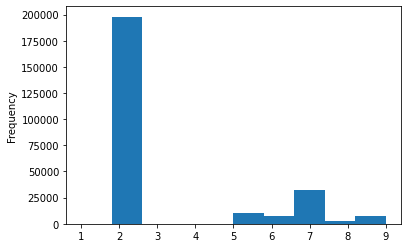

In [7]:
huge_df.num_handshake_frames.plot(kind='hist')

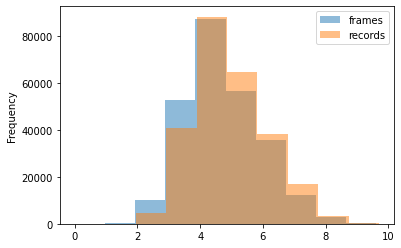

In [20]:
ax = plt.subplot()
np.log(huge_df.num_frames).plot(kind='hist', alpha=0.5, ax=ax, label='frames')
np.log(huge_df.num_records).plot(kind='hist', alpha=0.5, ax=ax, label='records')
ax.legend()

Text(0.5, 0, '$\\log(num\\_frames)$')

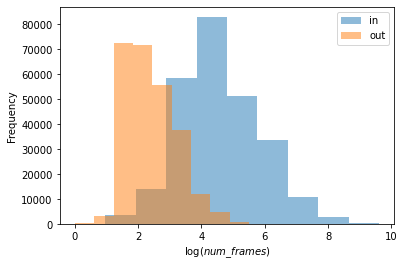

In [23]:
ax = plt.subplot()
np.log(huge_df.num_frames_in.loc[huge_df.num_frames_in > 0]).plot(kind='hist', alpha=0.5, ax=ax, label='in')
np.log(huge_df.num_frames_out.loc[huge_df.num_frames_out > 0]).plot(kind='hist', alpha=0.5, ax=ax, label='out')
ax.legend()
ax.set_xlabel("$\log(num\_frames)$")

In [49]:
plt.hist?

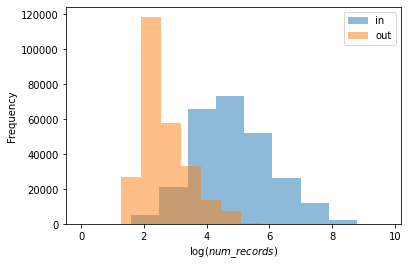

In [61]:
ax = plt.subplot()
np.log(huge_df.num_records_in.loc[huge_df.num_records_in > 0]).plot(kind='hist', alpha=0.5, ax=ax, label='in')
np.log(huge_df.num_records_out.loc[huge_df.num_records_out > 0]).plot(kind='hist', alpha=0.5, ax=ax, label='out')
ax.legend()
ax.set_xlabel("$\log(num\_records)$")
# ax.set_xticklabels([f"$e^{{{t}}}$" for t in range(20)])
ticklabels = ax.get_xticklabels(which='major')

In [58]:
ticklabels[0]._x

-2.0

<AxesSubplot:xlabel='tag'>

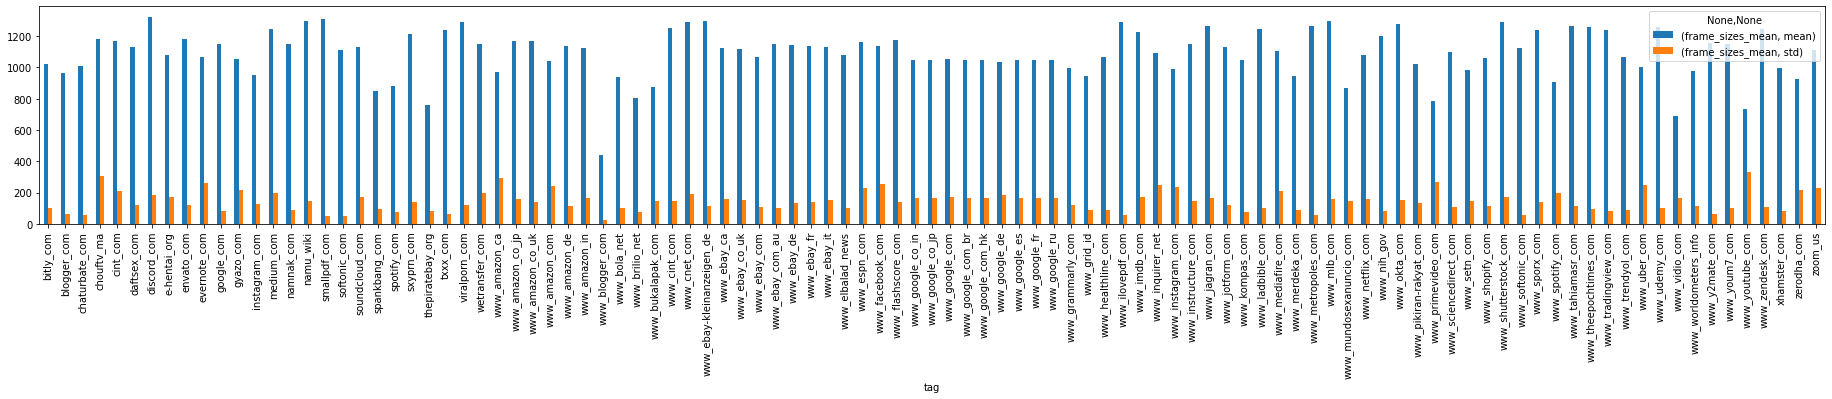

In [35]:
tmp = huge_df.loc[:, ['frame_sizes_mean', 'tag']].groupby('tag').agg([np.mean, np.std])
ax = plt.subplot()
fig = plt.gcf()
fig.set_figwidth(32)
tmp.dropna().plot(kind='bar', ax=ax)

<AxesSubplot:xlabel='tag'>

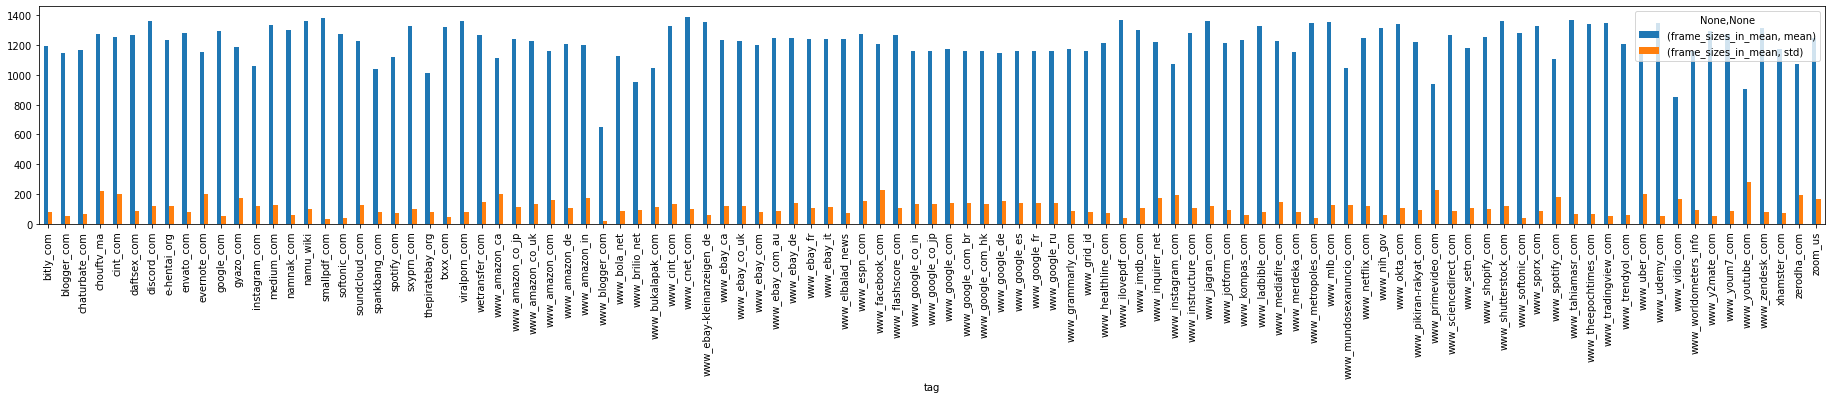

In [39]:
tmp = huge_df.loc[:, ['frame_sizes_in_mean', 'tag']].groupby('tag').agg([np.mean, np.std])
ax = plt.subplot()
fig = plt.gcf()
fig.set_figwidth(32)
tmp.dropna().plot(kind='bar', ax=ax)

<AxesSubplot:xlabel='tag'>

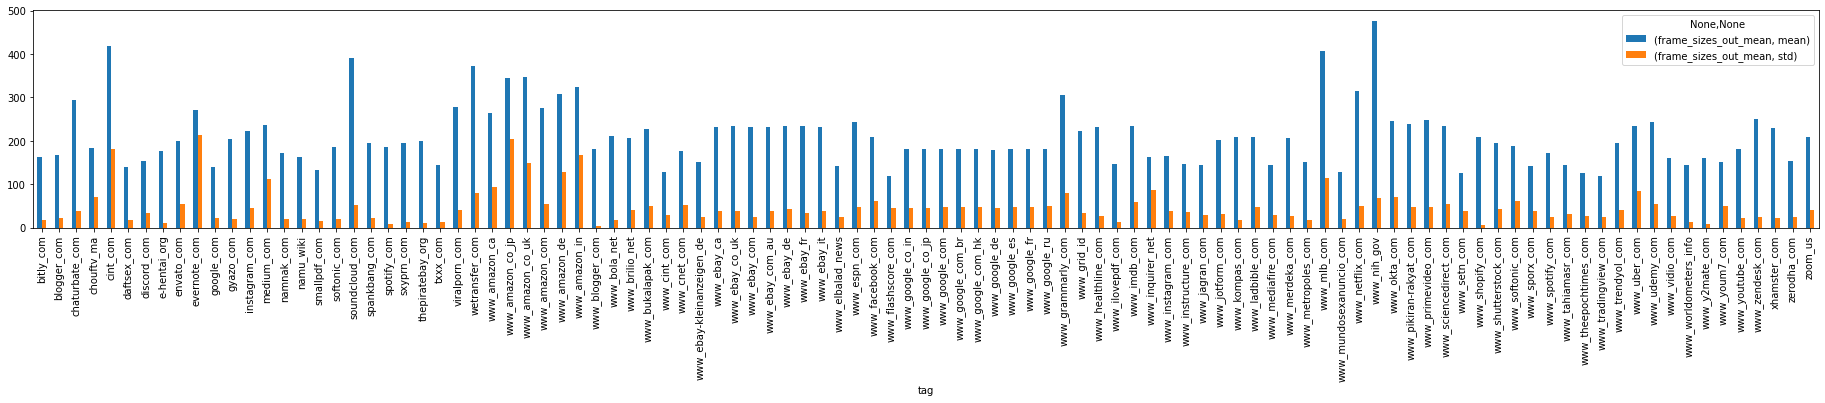

In [40]:
tmp = huge_df.loc[:, ['frame_sizes_out_mean', 'tag']].groupby('tag').agg([np.mean, np.std])
ax = plt.subplot()
fig = plt.gcf()
fig.set_figwidth(32)
tmp.dropna().plot(kind='bar', ax=ax)

<AxesSubplot:xlabel='tag'>

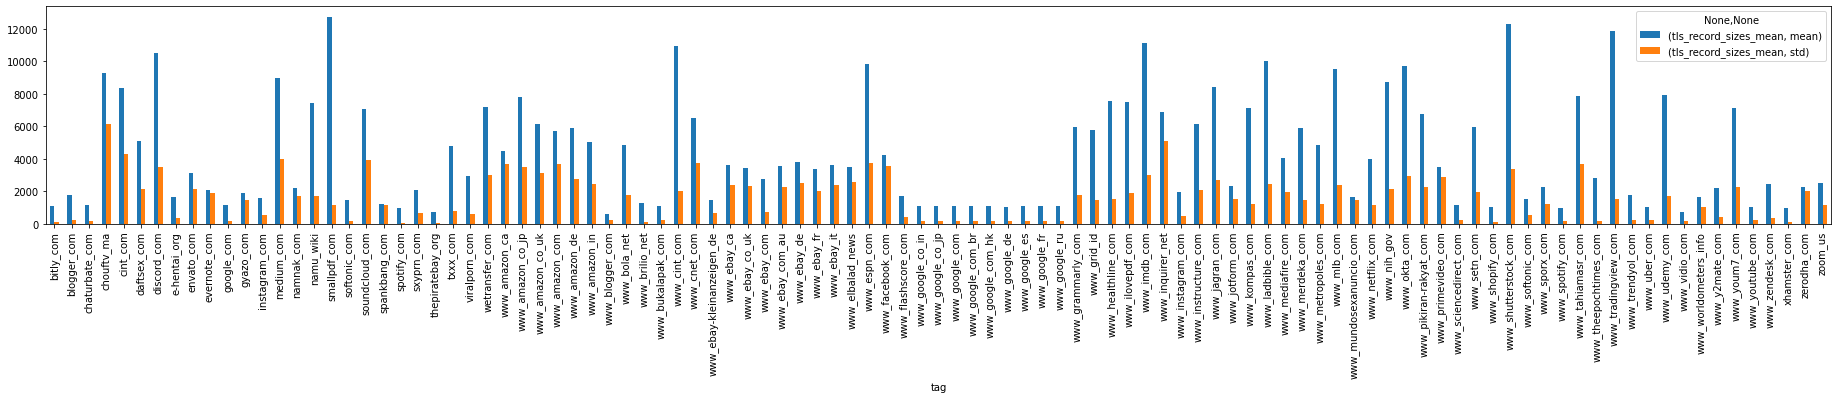

In [37]:
tmp = huge_df.loc[:, ['tls_record_sizes_mean', 'tag']].groupby('tag').agg([np.mean, np.std])
ax = plt.subplot()
fig = plt.gcf()
fig.set_figwidth(32)
tmp.dropna().plot(kind='bar', ax=ax)

<AxesSubplot:xlabel='tag'>

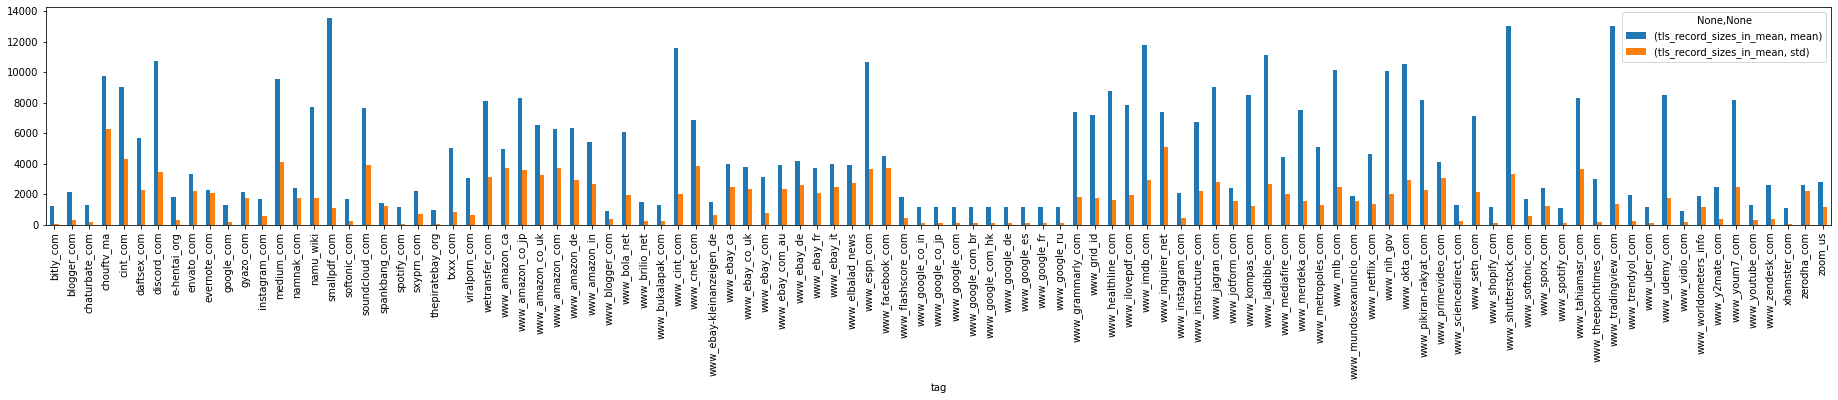

In [41]:
tmp = huge_df.loc[:, ['tls_record_sizes_in_mean', 'tag']].groupby('tag').agg([np.mean, np.std])
ax = plt.subplot()
fig = plt.gcf()
fig.set_figwidth(32)
tmp.dropna().plot(kind='bar', ax=ax)

<AxesSubplot:xlabel='tag'>

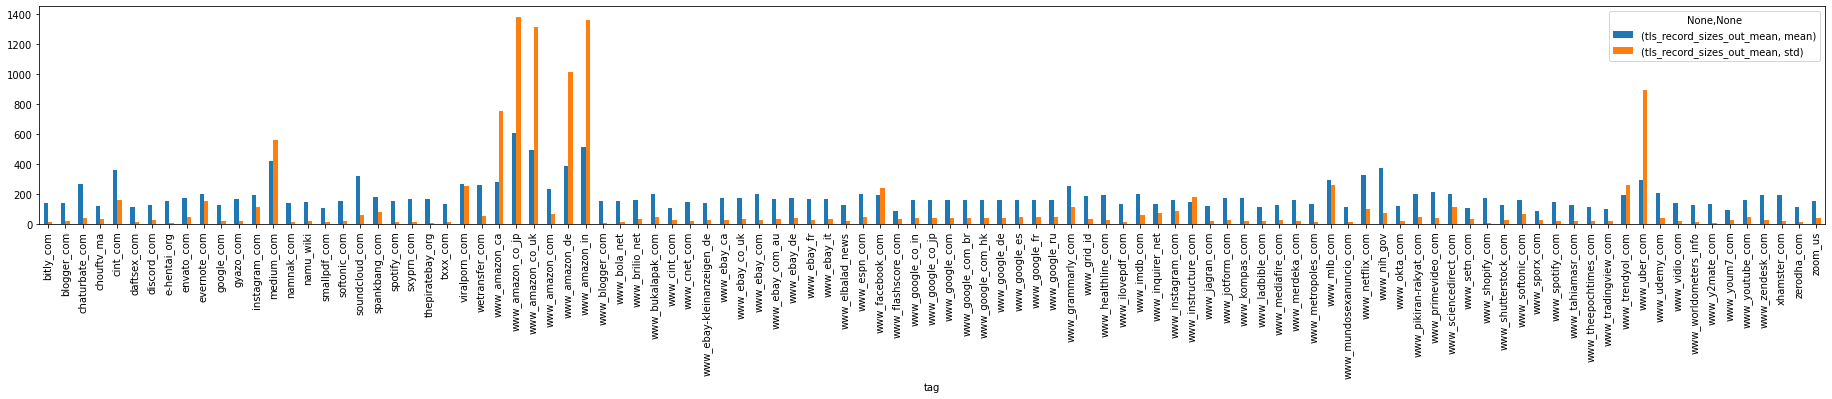

In [42]:
tmp = huge_df.loc[:, ['tls_record_sizes_out_mean', 'tag']].groupby('tag').agg([np.mean, np.std])
ax = plt.subplot()
fig = plt.gcf()
fig.set_figwidth(32)
tmp.dropna().plot(kind='bar', ax=ax)

# Similarities Frames 30

In [4]:
frames30 = pd.read_hdf('../data/seq-summaries-one-bin-record-len-30.h5', key='seq-summaries')

In [6]:
frames30.head()

,tag_one,tag_two,similarities
0,www.ebay.com,www.ebay.com,"[0, 1, 0, 0, 0, 0, 2, 3, 0, 1, 1, 1, 1, 0, 0, ..."
1,www.ebay.com,www.ebay.de,"[10, 11, 12, 15, 23, 12, 10, 12, 11, 10, 13, 1..."
2,www.ebay.com,www.ebay.co.uk,"[11, 10, 15, 10, 10, 10, 11, 10, 10, 10, 10, 1..."
3,www.ebay.com,www.ebay.com.au,"[10, 10, 10, 16, 10, 10, 10, 10, 10, 10, 10, 1..."
4,www.ebay.com,www.ebay.fr,"[10, 10, 15, 10, 11, 10, 10, 10, 10, 10, 12, 1..."


In [50]:
content = []
for idx, r in frames30.iterrows():
    print(idx / frames30.shape[0] * 100)
    content.append([r.tag_one, r.tag_two, np.median(r.similarities)])

0.0
0.009070294784580499
0.018140589569160998
0.027210884353741496
0.036281179138321996
0.045351473922902494
0.05442176870748299
0.06349206349206349
0.07256235827664399
0.0816326530612245
0.09070294784580499
0.09977324263038549
0.10884353741496598
0.1179138321995465
0.12698412698412698
0.13605442176870747
0.14512471655328799
0.15419501133786848
0.163265306122449
0.17233560090702948
0.18140589569160998
0.19047619047619047
0.19954648526077098
0.20861678004535145
0.21768707482993196
0.22675736961451248
0.235827664399093
0.24489795918367346
0.25396825396825395
0.2630385487528345
0.27210884353741494
0.2811791383219955
0.29024943310657597
0.29931972789115646
0.30839002267573695
0.31746031746031744
0.326530612244898
0.3356009070294784
0.34467120181405897
0.35374149659863946
0.36281179138321995
0.37188208616780044
0.38095238095238093
0.3900226757369615
0.39909297052154197
0.40816326530612246
0.4172335600907029
0.42630385487528344
0.43537414965986393
0.4444444444444444
0.45351473922902497
0.462

3.9637188208616783
3.972789115646259
3.9818594104308387
3.9909297052154193
4.0
4.009070294784581
4.01814058956916
4.0272108843537415
4.036281179138322
4.045351473922903
4.054421768707483
4.063492063492063
4.072562358276644
4.081632653061225
4.090702947845805
4.099773242630386
4.108843537414966
4.117913832199546
4.1269841269841265
4.136054421768708
4.145124716553288
4.154195011337868
4.163265306122449
4.172335600907029
4.1814058956916105
4.190476190476191
4.199546485260771
4.208616780045352
4.217687074829931
4.226757369614512
4.235827664399093
4.244897959183674
4.253968253968254
4.263038548752834
4.272108843537415
4.2811791383219955
4.290249433106576
4.299319727891157
4.308390022675737
4.317460317460318
4.326530612244897
4.3356009070294785
4.344671201814059
4.353741496598639
4.36281179138322
4.3718820861678
4.380952380952381
4.390022675736962
4.399092970521542
4.408163265306123
4.417233560090703
4.426303854875283
4.4353741496598635
4.444444444444445
4.453514739229025
4.462585034013605
4

8.117913832199546
8.126984126984127
8.136054421768707
8.145124716553289
8.154195011337869
8.16326530612245
8.17233560090703
8.18140589569161
8.190476190476192
8.199546485260772
8.20861678004535
8.217687074829932
8.226757369614512
8.235827664399093
8.244897959183675
8.253968253968253
8.263038548752833
8.272108843537415
8.281179138321995
8.290249433106576
8.299319727891156
8.308390022675736
8.317460317460318
8.326530612244898
8.335600907029479
8.344671201814059
8.353741496598639
8.362811791383221
8.371882086167801
8.380952380952381
8.390022675736962
8.399092970521542
8.408163265306122
8.417233560090704
8.426303854875282
8.435374149659863
8.444444444444445
8.453514739229025
8.462585034013607
8.471655328798185
8.480725623582765
8.489795918367347
8.498866213151928
8.507936507936508
8.517006802721088
8.526077097505668
8.535147392290249
8.54421768707483
8.55328798185941
8.562358276643991
8.571428571428571
8.580498866213151
8.589569160997733
8.598639455782314
8.607709750566892
8.61678004535147

12.253968253968255
12.263038548752835
12.272108843537415
12.281179138321995
12.290249433106576
12.299319727891156
12.308390022675738
12.317460317460318
12.326530612244897
12.335600907029479
12.344671201814059
12.35374149659864
12.36281179138322
12.3718820861678
12.380952380952381
12.390022675736962
12.399092970521542
12.408163265306122
12.417233560090702
12.426303854875284
12.435374149659864
12.444444444444445
12.453514739229025
12.462585034013605
12.471655328798185
12.480725623582767
12.489795918367347
12.498866213151928
12.507936507936506
12.51700680272109
12.52607709750567
12.53514739229025
12.544217687074829
12.553287981859409
12.562358276643993
12.571428571428573
12.580498866213151
12.589569160997732
12.598639455782312
12.607709750566892
12.616780045351476
12.625850340136054
12.634920634920634
12.643990929705215
12.653061224489795
12.662131519274379
12.671201814058957
12.680272108843537
12.689342403628117
12.698412698412698
12.707482993197278
12.71655328798186
12.72562358276644
12

16.299319727891156
16.308390022675738
16.317460317460316
16.3265306122449
16.33560090702948
16.34467120181406
16.35374149659864
16.36281179138322
16.3718820861678
16.380952380952383
16.39002267573696
16.399092970521544
16.408163265306122
16.4172335600907
16.426303854875282
16.435374149659864
16.444444444444446
16.453514739229025
16.462585034013603
16.471655328798185
16.480725623582767
16.48979591836735
16.498866213151928
16.507936507936506
16.517006802721088
16.526077097505667
16.53514739229025
16.54421768707483
16.55328798185941
16.56235827664399
16.57142857142857
16.58049886621315
16.589569160997733
16.598639455782312
16.607709750566894
16.616780045351472
16.625850340136054
16.634920634920636
16.643990929705215
16.653061224489797
16.662131519274375
16.671201814058957
16.68027210884354
16.689342403628117
16.6984126984127
16.707482993197278
16.71655328798186
16.725623582766442
16.73469387755102
16.743764172335602
16.75283446712018
16.761904761904763
16.77097505668934
16.780045351473923

20.36281179138322
20.3718820861678
20.38095238095238
20.39002267573696
20.399092970521544
20.408163265306122
20.417233560090704
20.426303854875282
20.435374149659864
20.444444444444446
20.453514739229025
20.462585034013607
20.471655328798185
20.480725623582767
20.489795918367346
20.498866213151928
20.50793650793651
20.517006802721088
20.52607709750567
20.53514739229025
20.54421768707483
20.553287981859413
20.56235827664399
20.57142857142857
20.58049886621315
20.58956916099773
20.598639455782315
20.607709750566894
20.616780045351472
20.625850340136054
20.634920634920633
20.643990929705218
20.653061224489797
20.662131519274375
20.671201814058957
20.680272108843536
20.689342403628117
20.6984126984127
20.707482993197278
20.71655328798186
20.72562358276644
20.73469387755102
20.743764172335602
20.75283446712018
20.761904761904763
20.77097505668934
20.780045351473923
20.789115646258505
20.798185941043084
20.807256235827666
20.816326530612244
20.825396825396826
20.834467120181404
20.8435374149

24.489795918367346
24.498866213151928
24.50793650793651
24.517006802721088
24.52607709750567
24.53514739229025
24.54421768707483
24.55328798185941
24.56235827664399
24.571428571428573
24.58049886621315
24.589569160997733
24.598639455782312
24.607709750566894
24.616780045351476
24.625850340136054
24.634920634920636
24.643990929705215
24.653061224489793
24.66213151927438
24.671201814058957
24.68027210884354
24.689342403628117
24.698412698412696
24.70748299319728
24.71655328798186
24.72562358276644
24.73469387755102
24.7437641723356
24.752834467120184
24.761904761904763
24.77097505668934
24.780045351473923
24.7891156462585
24.798185941043084
24.807256235827666
24.816326530612244
24.825396825396826
24.834467120181404
24.843537414965986
24.85260770975057
24.861678004535147
24.87074829931973
24.879818594104307
24.88888888888889
24.897959183673468
24.90702947845805
24.91609977324263
24.92517006802721
24.934240362811792
24.94331065759637
24.952380952380953
24.961451247165535
24.970521541950113

28.57142857142857
28.58049886621315
28.58956916099773
28.598639455782315
28.607709750566894
28.616780045351476
28.625850340136054
28.634920634920636
28.643990929705215
28.653061224489797
28.662131519274375
28.671201814058954
28.680272108843536
28.689342403628114
28.6984126984127
28.70748299319728
28.71655328798186
28.725623582766442
28.73469387755102
28.743764172335602
28.75283446712018
28.76190476190476
28.77097505668934
28.78004535147392
28.7891156462585
28.798185941043087
28.807256235827666
28.816326530612248
28.825396825396826
28.834467120181408
28.843537414965986
28.852607709750565
28.861678004535147
28.870748299319725
28.879818594104307
28.888888888888886
28.89795918367347
28.907029478458053
28.91609977324263
28.92517006802721
28.934240362811792
28.94331065759637
28.952380952380953
28.96145124716553
28.970521541950113
28.97959183673469
28.98866213151927
28.997732426303855
29.006802721088437
29.015873015873016
29.024943310657598
29.034013605442176
29.04308390022676
29.052154195011

32.625850340136054
32.63492063492063
32.64399092970521
32.6530612244898
32.66213151927438
32.67120181405896
32.68027210884354
32.68934240362812
32.698412698412696
32.70748299319728
32.71655328798186
32.72562358276644
32.73469387755102
32.7437641723356
32.75283446712018
32.761904761904766
32.770975056689345
32.78004535147392
32.7891156462585
32.79818594104309
32.807256235827666
32.816326530612244
32.82539682539682
32.8344671201814
32.843537414965986
32.852607709750565
32.86167800453515
32.87074829931973
32.87981859410431
32.88888888888889
32.89795918367347
32.90702947845805
32.91609977324263
32.92517006802721
32.93424036281179
32.94331065759637
32.95238095238095
32.961451247165535
32.97052154195011
32.9795918367347
32.98866213151928
32.997732426303855
33.006802721088434
33.01587301587301
33.0249433106576
33.034013605442176
33.043083900226755
33.05215419501133
33.06122448979592
33.0702947845805
33.07936507936508
33.08843537414966
33.09750566893424
33.10657596371882
33.1156462585034
33.12

36.78004535147392
36.7891156462585
36.79818594104308
36.807256235827666
36.816326530612244
36.82539682539683
36.83446712018141
36.843537414965986
36.852607709750565
36.86167800453515
36.87074829931973
36.87981859410431
36.888888888888886
36.897959183673464
36.90702947845805
36.91609977324263
36.925170068027214
36.93424036281179
36.94331065759637
36.952380952380956
36.961451247165535
36.97052154195011
36.97959183673469
36.98866213151927
36.997732426303855
37.006802721088434
37.01587301587301
37.0249433106576
37.034013605442176
37.04308390022676
37.05215419501134
37.06122448979592
37.0702947845805
37.079365079365076
37.08843537414966
37.09750566893424
37.10657596371882
37.115646258503396
37.12471655328798
37.13378684807257
37.142857142857146
37.151927437641724
37.1609977324263
37.17006802721088
37.17913832199547
37.188208616780045
37.197278911564624
37.2063492063492
37.21541950113379
37.22448979591837
37.23356009070295
37.24263038548753
37.25170068027211
37.26077097505669
37.269841269841

40.91609977324263
40.925170068027214
40.93424036281179
40.94331065759637
40.95238095238095
40.961451247165535
40.97052154195011
40.97959183673469
40.98866213151928
40.997732426303855
41.006802721088434
41.01587301587302
41.0249433106576
41.034013605442176
41.043083900226755
41.05215419501134
41.06122448979592
41.0702947845805
41.079365079365076
41.08843537414966
41.09750566893424
41.106575963718825
41.1156462585034
41.12471655328798
41.13378684807256
41.14285714285714
41.151927437641724
41.1609977324263
41.17006802721088
41.17913832199546
41.188208616780045
41.19727891156463
41.20634920634921
41.21541950113379
41.224489795918366
41.233560090702944
41.24263038548753
41.25170068027211
41.26077097505669
41.269841269841265
41.27891156462585
41.287981859410436
41.297052154195015
41.30612244897959
41.31519274376417
41.32426303854875
41.333333333333336
41.342403628117914
41.35147392290249
41.36054421768707
41.36961451247166
41.378684807256235
41.38775510204082
41.3968253968254
41.405895691609

45.0702947845805
45.07936507936508
45.08843537414966
45.09750566893424
45.10657596371882
45.1156462585034
45.12471655328798
45.13378684807256
45.14285714285714
45.151927437641724
45.1609977324263
45.17006802721089
45.17913832199547
45.188208616780045
45.197278911564624
45.2063492063492
45.21541950113379
45.224489795918366
45.233560090702944
45.24263038548752
45.25170068027211
45.260770975056694
45.26984126984127
45.27891156462585
45.28798185941043
45.29705215419501
45.30612244897959
45.31519274376417
45.32426303854875
45.33333333333333
45.342403628117914
45.3514739229025
45.36054421768708
45.36961451247166
45.378684807256235
45.38775510204081
45.3968253968254
45.40589569160998
45.414965986394556
45.424036281179134
45.43310657596372
45.442176870748305
45.451247165532884
45.46031746031746
45.46938775510204
45.47845804988662
45.487528344671205
45.49659863945578
45.50566893424036
45.51473922902494
45.52380952380952
45.532879818594104
45.54195011337869
45.55102040816327
45.560090702947846
4

49.23356009070295
49.24263038548753
49.25170068027211
49.26077097505669
49.26984126984127
49.27891156462585
49.28798185941043
49.29705215419501
49.306122448979586
49.31519274376417
49.32426303854876
49.333333333333336
49.342403628117914
49.35147392290249
49.36054421768708
49.36961451247166
49.378684807256235
49.38775510204081
49.39682539682539
49.40589569160998
49.41496598639456
49.42403628117914
49.43310657596372
49.4421768707483
49.45124716553288
49.46031746031746
49.46938775510204
49.47845804988662
49.4875283446712
49.49659863945578
49.50566893424037
49.51473922902495
49.523809523809526
49.532879818594104
49.54195011337868
49.55102040816327
49.560090702947846
49.569160997732425
49.578231292517
49.58730158730159
49.59637188208617
49.60544217687075
49.61451247165533
49.62358276643991
49.63265306122449
49.641723356009074
49.65079365079365
49.65986394557823
49.66893424036281
49.678004535147394
49.68707482993197
49.69614512471655
49.70521541950114
49.714285714285715
49.723356009070294
49

53.43310657596372
53.442176870748305
53.45124716553288
53.46031746031746
53.46938775510204
53.478458049886626
53.4875283446712
53.49659863945578
53.50566893424036
53.51473922902494
53.52380952380953
53.532879818594104
53.54195011337869
53.55102040816326
53.560090702947846
53.569160997732425
53.57823129251701
53.58730158730158
53.59637188208617
53.605442176870746
53.61451247165533
53.62358276643992
53.63265306122449
53.641723356009074
53.65079365079365
53.65986394557824
53.66893424036281
53.678004535147394
53.687074829931966
53.69614512471655
53.70521541950113
53.714285714285715
53.7233560090703
53.73242630385487
53.74149659863946
53.750566893424036
53.75963718820862
53.76870748299319
53.77777777777778
53.78684807256236
53.79591836734694
53.804988662131514
53.8140589569161
53.823129251700685
53.832199546485256
53.84126984126985
53.85034013605442
53.859410430839006
53.86848072562358
53.87755102040816
53.88662131519274
53.89569160997733
53.9047619047619
53.91383219954648
53.92290249433107

57.61451247165533
57.62358276643991
57.632653061224495
57.64172335600907
57.65079365079365
57.65986394557822
57.668934240362816
57.67800453514739
57.68707482993197
57.69614512471656
57.70521541950113
57.714285714285715
57.723356009070294
57.73242630385488
57.74149659863945
57.750566893424036
57.759637188208615
57.7687074829932
57.77777777777777
57.78684807256236
57.79591836734694
57.80498866213152
57.81405895691611
57.82312925170068
57.83219954648526
57.841269841269835
57.85034013605442
57.859410430839
57.868480725623584
57.877551020408156
57.88662131519274
57.89569160997733
57.904761904761905
57.91383219954649
57.92290249433106
57.93197278911565
57.941043083900226
57.95011337868481
57.95918367346938
57.96825396825397
57.97732426303854
57.98639455782313
57.99546485260771
58.00453514739229
58.013605442176875
58.022675736961446
58.03174603174603
58.04081632653061
58.049886621315196
58.05895691609977
58.06802721088435
58.07709750566893
58.08616780045352
58.0952380952381
58.10430839002267


61.73242630385487
61.74149659863946
61.75056689342404
61.759637188208615
61.7687074829932
61.77777777777778
61.786848072562364
61.795918367346935
61.80498866213152
61.8140589569161
61.82312925170068
61.832199546485256
61.84126984126984
61.85034013605443
61.859410430839
61.868480725623584
61.87755102040816
61.88662131519275
61.89569160997732
61.904761904761905
61.91383219954648
61.92290249433107
61.93197278911564
61.941043083900226
61.95011337868481
61.95918367346939
61.968253968253975
61.97732426303855
61.98639455782313
61.995464852607704
62.00453514739229
62.01360544217687
62.02267573696145
62.031746031746025
62.04081632653061
62.049886621315196
62.058956916099774
62.06802721088436
62.07709750566893
62.08616780045352
62.095238095238095
62.10430839002268
62.11337868480725
62.12244897959184
62.131519274376416
62.140589569160994
62.14965986394559
62.15873015873016
62.167800453514744
62.176870748299315
62.1859410430839
62.19501133786848
62.204081632653065
62.213151927437636
62.22222222222

65.89569160997732
65.9047619047619
65.91383219954649
65.92290249433107
65.93197278911565
65.94104308390023
65.9501133786848
65.9591836734694
65.96825396825396
65.97732426303855
65.98639455782312
65.99546485260771
66.00453514739229
66.01360544217687
66.02267573696146
66.03174603174602
66.04081632653062
66.0498866213152
66.05895691609977
66.06802721088435
66.07709750566893
66.08616780045351
66.0952380952381
66.10430839002267
66.11337868480726
66.12244897959184
66.13151927437642
66.140589569161
66.14965986394557
66.15873015873017
66.16780045351473
66.17687074829932
66.1859410430839
66.19501133786848
66.20408163265306
66.21315192743764
66.22222222222223
66.2312925170068
66.24036281179139
66.24943310657596
66.25850340136054
66.26757369614512
66.27664399092971
66.28571428571428
66.29478458049887
66.30385487528345
66.31292517006803
66.3219954648526
66.33106575963718
66.34013605442178
66.34920634920634
66.35827664399093
66.36734693877551
66.37641723356009
66.38548752834467
66.39455782312925
66

70.0952380952381
70.10430839002268
70.11337868480726
70.12244897959184
70.13151927437642
70.140589569161
70.14965986394557
70.15873015873015
70.16780045351474
70.17687074829932
70.1859410430839
70.19501133786848
70.20408163265306
70.21315192743765
70.22222222222221
70.2312925170068
70.24036281179139
70.24943310657596
70.25850340136054
70.26757369614512
70.27664399092971
70.28571428571428
70.29478458049887
70.30385487528345
70.31292517006803
70.3219954648526
70.33106575963718
70.34013605442176
70.34920634920636
70.35827664399092
70.36734693877551
70.37641723356009
70.38548752834467
70.39455782312926
70.40362811791383
70.41269841269842
70.421768707483
70.43083900226758
70.43990929705215
70.44897959183673
70.45804988662131
70.46712018140589
70.47619047619048
70.48526077097506
70.49433106575964
70.50340136054422
70.5124716553288
70.52154195011337
70.53061224489797
70.53968253968253
70.54875283446712
70.5578231292517
70.56689342403628
70.57596371882087
70.58503401360544
70.59410430839003
70

74.36734693877551
74.37641723356009
74.38548752834467
74.39455782312925
74.40362811791384
74.4126984126984
74.421768707483
74.43083900226758
74.43990929705215
74.44897959183675
74.45804988662131
74.4671201814059
74.47619047619047
74.48526077097506
74.49433106575964
74.50340136054422
74.5124716553288
74.52154195011337
74.53061224489797
74.53968253968254
74.54875283446712
74.5578231292517
74.56689342403628
74.57596371882086
74.58503401360545
74.59410430839002
74.60317460317461
74.61224489795917
74.62131519274377
74.63038548752834
74.63945578231292
74.64852607709751
74.65759637188208
74.66666666666667
74.67573696145125
74.68480725623583
74.6938775510204
74.70294784580499
74.71201814058956
74.72108843537416
74.73015873015873
74.73922902494331
74.74829931972789
74.75736961451247
74.76643990929705
74.77551020408163
74.78458049886622
74.79365079365078
74.80272108843538
74.81179138321995
74.82086167800453
74.82993197278913
74.83900226757369
74.84807256235828
74.85714285714286
74.86621315192744

78.6485260770975
78.6575963718821
78.66666666666666
78.67573696145125
78.68480725623583
78.6938775510204
78.702947845805
78.71201814058956
78.72108843537416
78.73015873015873
78.73922902494331
78.74829931972789
78.75736961451247
78.76643990929705
78.77551020408163
78.7845804988662
78.7936507936508
78.80272108843538
78.81179138321995
78.82086167800453
78.82993197278911
78.8390022675737
78.84807256235827
78.85714285714286
78.86621315192744
78.87528344671202
78.8843537414966
78.89342403628117
78.90249433106577
78.91156462585033
78.92063492063492
78.9297052154195
78.93877551020408
78.94784580498866
78.95691609977324
78.96598639455782
78.97505668934241
78.98412698412697
78.99319727891157
79.00226757369614
79.01133786848072
79.02040816326532
79.02947845804988
79.03854875283447
79.04761904761905
79.05668934240363
79.06575963718821
79.07482993197279
79.08390022675736
79.09297052154194
79.10204081632654
79.11111111111111
79.12018140589569
79.12925170068027
79.13832199546485
79.14739229024943
79

82.82086167800453
82.82993197278911
82.83900226757369
82.84807256235828
82.85714285714286
82.86621315192744
82.87528344671202
82.8843537414966
82.89342403628119
82.90249433106575
82.91156462585035
82.92063492063491
82.9297052154195
82.93877551020408
82.94784580498866
82.95691609977325
82.96598639455782
82.97505668934241
82.98412698412699
82.99319727891157
83.00226757369614
83.01133786848072
83.0204081632653
83.0294784580499
83.03854875283446
83.04761904761905
83.05668934240363
83.06575963718821
83.0748299319728
83.08390022675736
83.09297052154196
83.10204081632652
83.11111111111111
83.12018140589569
83.12925170068027
83.13832199546485
83.14739229024943
83.15646258503402
83.1655328798186
83.17460317460318
83.18367346938776
83.19274376417233
83.20181405895691
83.2108843537415
83.21995464852607
83.22902494331066
83.23809523809523
83.24716553287982
83.2562358276644
83.26530612244898
83.27437641723357
83.28344671201813
83.29251700680273
83.3015873015873
83.31065759637188
83.31972789115646
8

87.12018140589569
87.12925170068027
87.13832199546485
87.14739229024944
87.156462585034
87.1655328798186
87.17460317460318
87.18367346938776
87.19274376417233
87.20181405895691
87.21088435374149
87.21995464852608
87.22902494331066
87.23809523809524
87.24716553287982
87.2562358276644
87.26530612244898
87.27437641723355
87.28344671201815
87.29251700680271
87.3015873015873
87.31065759637188
87.31972789115646
87.32879818594105
87.33786848072562
87.34693877551021
87.35600907029479
87.36507936507937
87.37414965986395
87.38321995464852
87.3922902494331
87.40136054421768
87.41043083900226
87.41950113378685
87.42857142857143
87.43764172335601
87.44671201814059
87.45578231292517
87.46485260770976
87.47392290249432
87.48299319727892
87.4920634920635
87.50113378684807
87.51020408163265
87.51927437641723
87.52834467120182
87.53741496598639
87.54648526077098
87.55555555555556
87.56462585034014
87.57369614512471
87.58276643990929
87.59183673469387
87.60090702947846
87.60997732426303
87.61904761904762

91.3922902494331
91.4013605442177
91.41043083900226
91.41950113378685
91.42857142857143
91.43764172335601
91.44671201814059
91.45578231292517
91.46485260770974
91.47392290249434
91.48299319727892
91.4920634920635
91.50113378684807
91.51020408163265
91.51927437641724
91.52834467120181
91.5374149659864
91.54648526077096
91.55555555555556
91.56462585034014
91.57369614512471
91.5827664399093
91.59183673469387
91.60090702947846
91.60997732426304
91.61904761904762
91.6281179138322
91.63718820861678
91.64625850340136
91.65532879818595
91.66439909297051
91.6734693877551
91.68253968253968
91.69160997732426
91.70068027210885
91.70975056689342
91.71882086167801
91.72789115646258
91.73696145124717
91.74603174603175
91.75510204081633
91.7641723356009
91.77324263038548
91.78231292517007
91.79138321995465
91.80045351473923
91.80952380952381
91.81859410430839
91.82766439909297
91.83673469387756
91.84580498866212
91.85487528344672
91.86394557823128
91.87301587301587
91.88208616780045
91.89115646258503


95.68253968253968
95.69160997732426
95.70068027210884
95.70975056689342
95.718820861678
95.72789115646259
95.73696145124715
95.74603174603175
95.75510204081633
95.7641723356009
95.7732426303855
95.78231292517006
95.79138321995465
95.80045351473923
95.80952380952381
95.81859410430839
95.82766439909297
95.83673469387755
95.84580498866214
95.85487528344672
95.8639455782313
95.87301587301587
95.88208616780045
95.89115646258503
95.90022675736961
95.9092970521542
95.91836734693877
95.92743764172336
95.93650793650794
95.94557823129252
95.95464852607711
95.96371882086167
95.97278911564626
95.98185941043084
95.99092970521542
96.0
96.00907029478458
96.01814058956916
96.02721088435374
96.03628117913833
96.0453514739229
96.05442176870748
96.06349206349206
96.07256235827664
96.08163265306122
96.09070294784581
96.09977324263038
96.10884353741497
96.11791383219955
96.12698412698413
96.13605442176872
96.14512471655328
96.15419501133788
96.16326530612244
96.17233560090703
96.18140589569161
96.190476190

99.87301587301587
99.88208616780045
99.89115646258503
99.90022675736961
99.9092970521542
99.91836734693878
99.92743764172336
99.93650793650794
99.94557823129252
99.9546485260771
99.96371882086169
99.97278911564625
99.98185941043084
99.99092970521542


In [51]:
df_mean = df

In [52]:
df_median = pd.DataFrame(content, columns=['tag_one', 'tag_two', 'mean'])

In [54]:
tmp = df_median.drop_duplicates().set_index(['tag_one', 'tag_two']).sort_index().unstack()

[Text(0, 0, 'bitly.com'),
 Text(0, 1, 'blogger.com'),
 Text(0, 2, 'chaturbate.com'),
 Text(0, 3, 'chouftv.ma'),
 Text(0, 4, 'cint.com'),
 Text(0, 5, 'daftsex.com'),
 Text(0, 6, 'discord.com'),
 Text(0, 7, 'e-hentai.org'),
 Text(0, 8, 'envato.com'),
 Text(0, 9, 'evernote.com'),
 Text(0, 10, 'google.com'),
 Text(0, 11, 'gyazo.com'),
 Text(0, 12, 'instagram.com'),
 Text(0, 13, 'medium.com'),
 Text(0, 14, 'namnak.com'),
 Text(0, 15, 'namu.wiki'),
 Text(0, 16, 'smallpdf.com'),
 Text(0, 17, 'softonic.com'),
 Text(0, 18, 'soundcloud.com'),
 Text(0, 19, 'spankbang.com'),
 Text(0, 20, 'spotify.com'),
 Text(0, 21, 'sxyprn.com'),
 Text(0, 22, 'thepiratebay.org'),
 Text(0, 23, 'txxx.com'),
 Text(0, 24, 'viralporn.com'),
 Text(0, 25, 'wetransfer.com'),
 Text(0, 26, 'www.amazon.ca'),
 Text(0, 27, 'www.amazon.co.jp'),
 Text(0, 28, 'www.amazon.co.uk'),
 Text(0, 29, 'www.amazon.com'),
 Text(0, 30, 'www.amazon.de'),
 Text(0, 31, 'www.amazon.in'),
 Text(0, 32, 'www.blogger.com'),
 Text(0, 33, 'www.bola.n

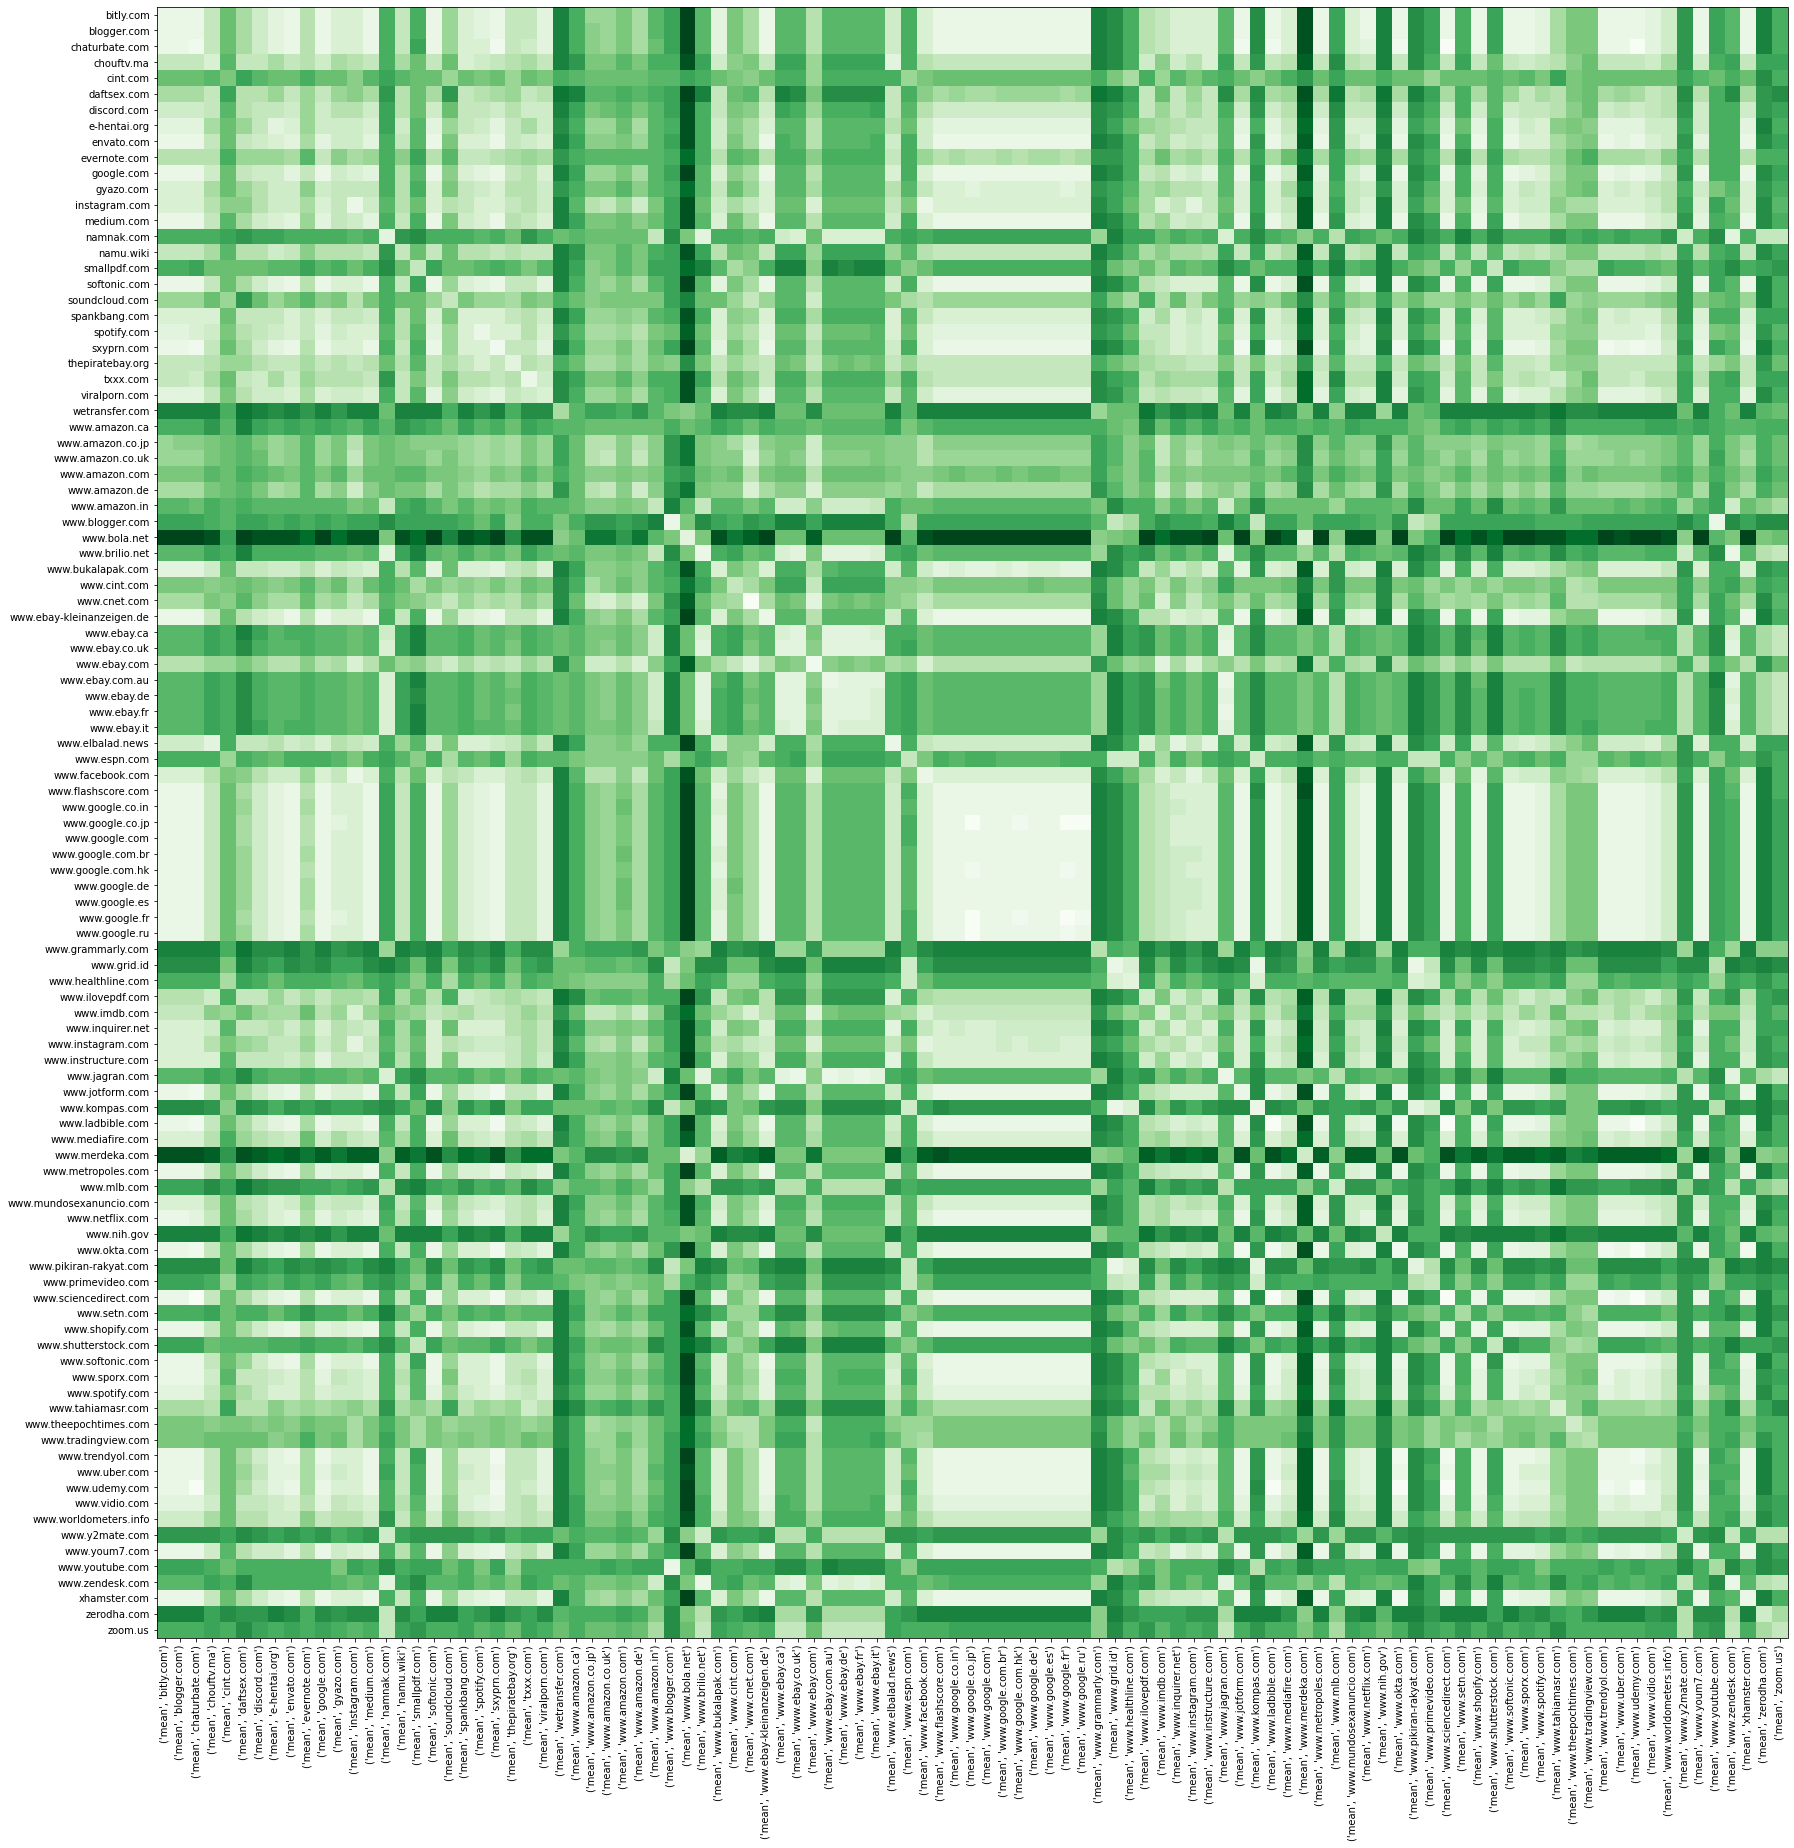

In [55]:
ax = plt.subplot()
fig = plt.gcf()
fig.set_figwidth(30)
fig.set_figheight(30)
ax.imshow(tmp.values, cmap="Greens")
ax.set_xticks(range(len(tmp.columns)))
ax.set_yticks(range(len(tmp.index)))
ax.set_xticklabels(tmp.columns, rotation=90)
ax.set_yticklabels(tmp.index)

In [40]:
frames30_ = frames30.set_index(['tag_one', 'tag_two']).sort_index()

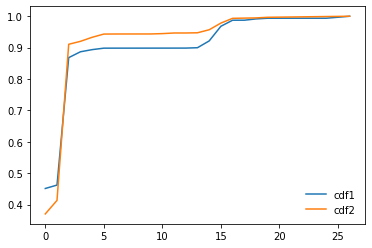

In [53]:
ax = plt.subplot()
cdf1 = make_cdf(frames30_.loc[pd.IndexSlice['www.google.co.in', 'www.google.co.in'], 'similarities'].values[0])
cdf2 = make_cdf(frames30_.loc[pd.IndexSlice['www.google.co.in', 'sxyprn.com'], 'similarities'].values[0])
ax.plot(cdf1.index.values, cdf1.values, label='cdf1')
ax.plot(cdf2.index.values, cdf2.values, label='cdf2')
ax.legend(frameon=False)